In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


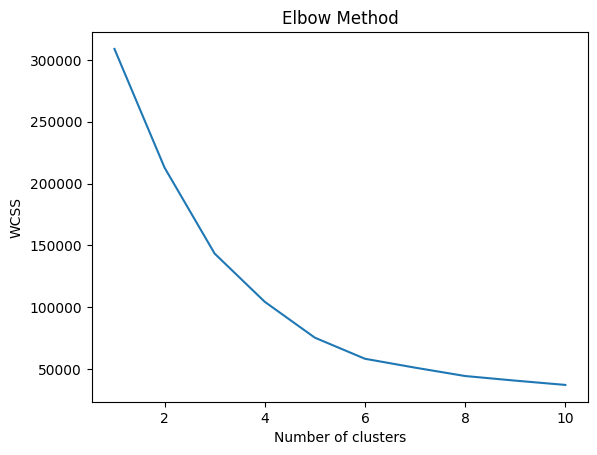

In [6]:
from sklearn.cluster import KMeans

X = df.iloc[:, [2, 3, 4]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

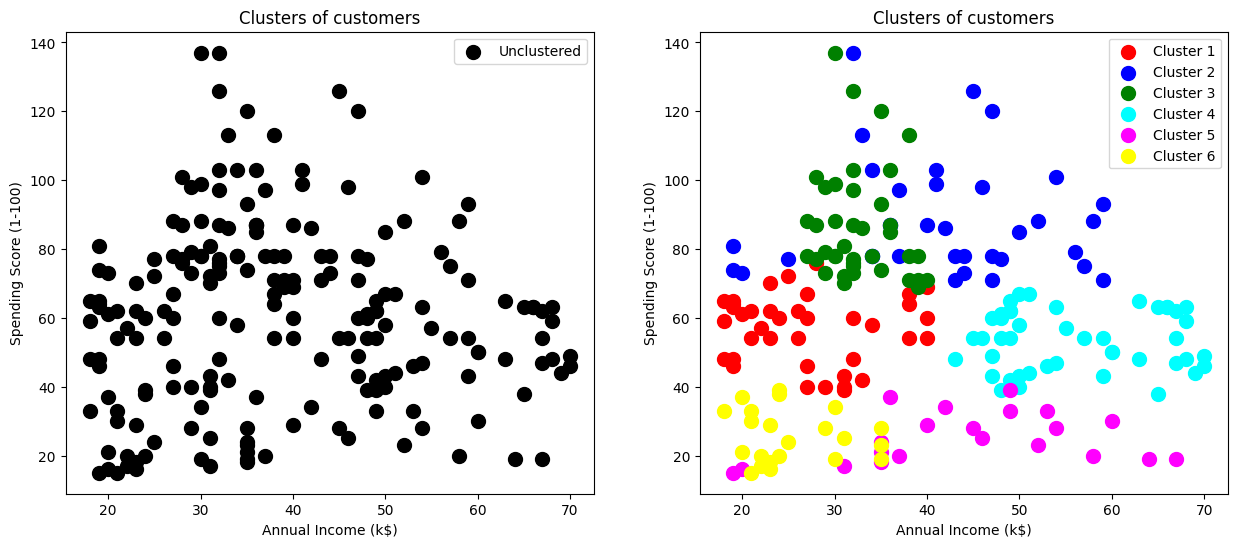

In [7]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)

y_kmeans = kmeans.fit_predict(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(X[:, 0], X[:, 1], s=100, c='black', label='Unclustered')

ax1.set_title('Clusters of customers')
ax1.set_xlabel('Annual Income (k$)')
ax1.set_ylabel('Spending Score (1-100)')
ax1.legend()

colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black', 'orange']

for i in range(kmeans.n_clusters):
    ax2.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=100, c=colors[i], label='Cluster ' + str(i + 1))

ax2.set_title('Clusters of customers')
ax2.set_xlabel('Annual Income (k$)')
ax2.set_ylabel('Spending Score (1-100)')
ax2.legend()

plt.show()

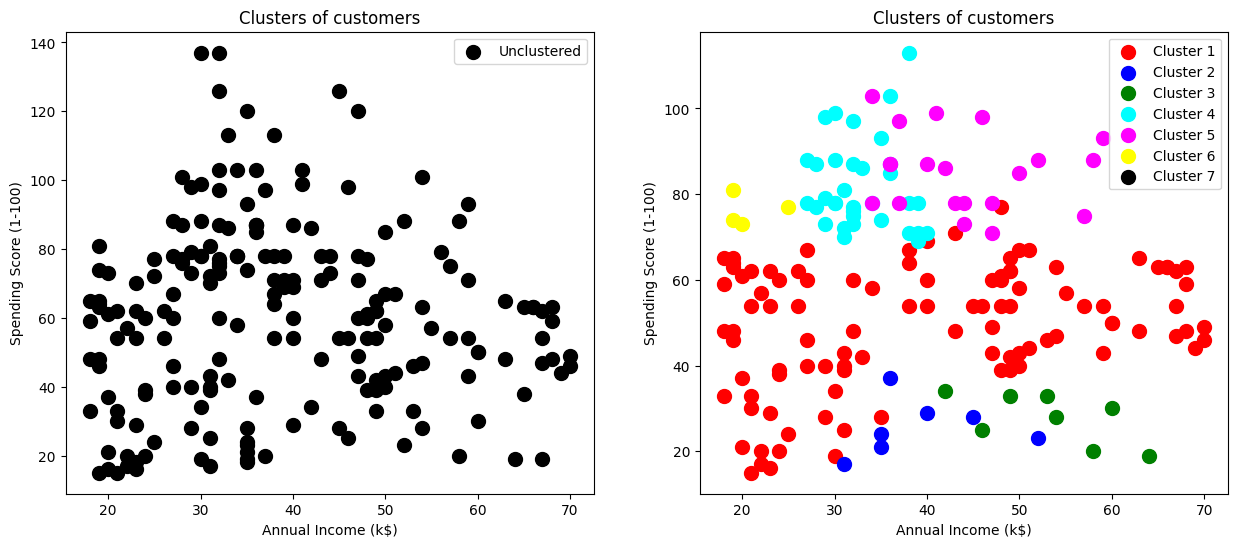

In [8]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=12, min_samples=4)

y_dbscan = dbscan.fit_predict(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(X[:, 0], X[:, 1], s=100, c='black', label='Unclustered')

ax1.set_title('Clusters of customers')
ax1.set_xlabel('Annual Income (k$)')
ax1.set_ylabel('Spending Score (1-100)')
ax1.legend()

for i in range(len(np.unique(y_dbscan))):
    ax2.scatter(X[y_dbscan == i, 0], X[y_dbscan == i, 1], s=100, c=colors[i], label='Cluster ' + str(i + 1))

ax2.set_title('Clusters of customers')
ax2.set_xlabel('Annual Income (k$)')
ax2.set_ylabel('Spending Score (1-100)')
ax2.legend()

plt.show()

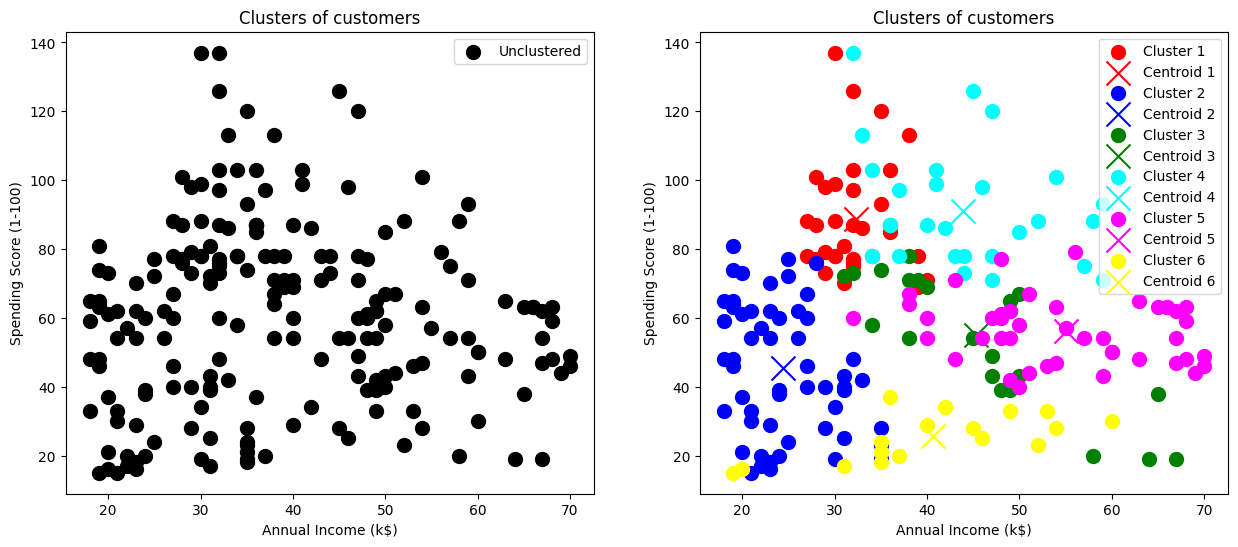

In [9]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=6, init_params='random', random_state=43)

y_em = model.fit_predict(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(X[:, 0], X[:, 1], s=100, c='black', label='Unclustered')

ax1.set_title('Clusters of customers')
ax1.set_xlabel('Annual Income (k$)')
ax1.set_ylabel('Spending Score (1-100)')
ax1.legend()

for i in range(model.n_components):
    ax2.scatter(X[y_em == i, 0], X[y_em == i, 1], s=100, c=colors[i], label='Cluster ' + str(i + 1))
    ax2.scatter(model.means_[i, 0], model.means_[i, 1], s=300, c=colors[i], label='Centroid ' + str(i + 1), marker='x')

ax2.set_title('Clusters of customers')
ax2.set_xlabel('Annual Income (k$)')
ax2.set_ylabel('Spending Score (1-100)')
ax2.legend()

plt.show()

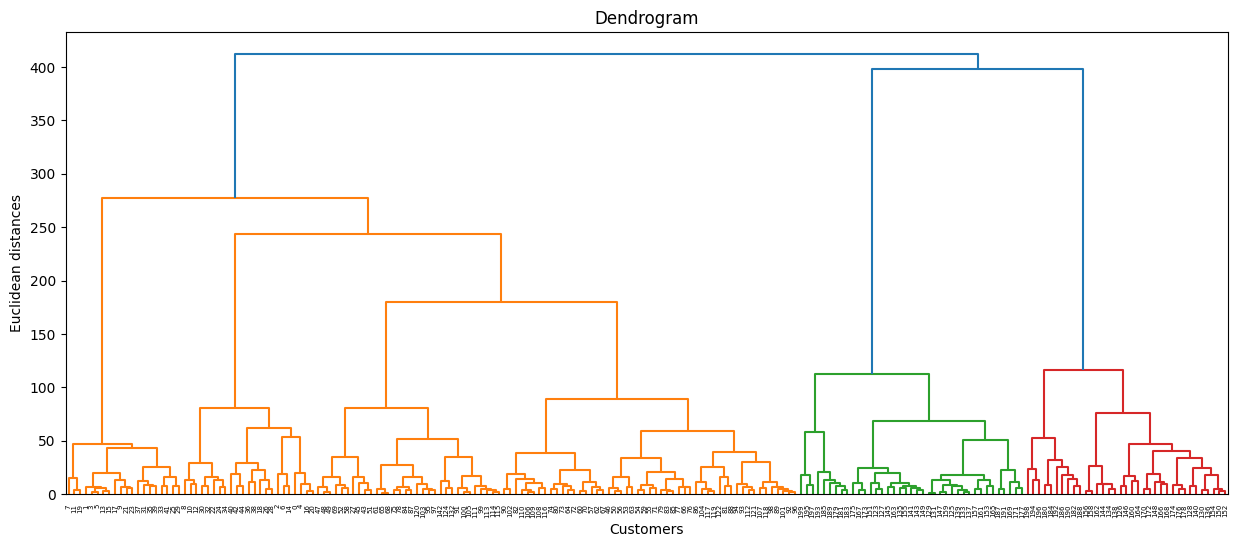

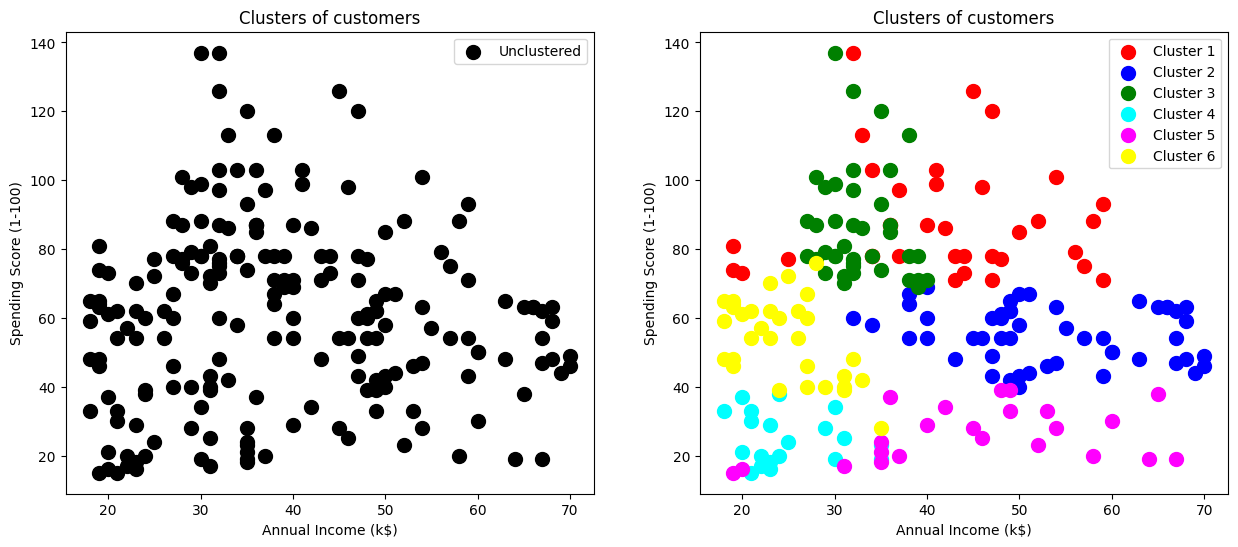

In [10]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(15, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

hc = AgglomerativeClustering(n_clusters=6, linkage='ward', metric='euclidean')

y_hc = hc.fit_predict(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(X[:, 0], X[:, 1], s=100, c='black', label='Unclustered')

ax1.set_title('Clusters of customers')
ax1.set_xlabel('Annual Income (k$)')
ax1.set_ylabel('Spending Score (1-100)')
ax1.legend()

for i in range(hc.n_clusters):
    ax2.scatter(X[y_hc == i, 0], X[y_hc == i, 1], s=100, c=colors[i], label='Cluster ' + str(i + 1))

ax2.set_title('Clusters of customers')
ax2.set_xlabel('Annual Income (k$)')
ax2.set_ylabel('Spending Score (1-100)')
ax2.legend()

plt.show()